# 🧠 CNN Tutorial using PyTorch on FashionMNIST
This notebook introduces **Convolutional Neural Networks (CNNs)** with the **FashionMNIST dataset** using **PyTorch**.

We'll cover:
1. Basic concepts of CNNs
2. Understanding the architecture
3. Loading and visualizing data
4. Training and evaluation
5. Visualizing predictions


## 🧩 Step 1: Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


## 🧮 Step 2: Load and Visualize the FashionMNIST Dataset

100%|██████████| 26421880/26421880 [00:03<00:00, 8475059.65it/s] 


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 176782.91it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3050363.90it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



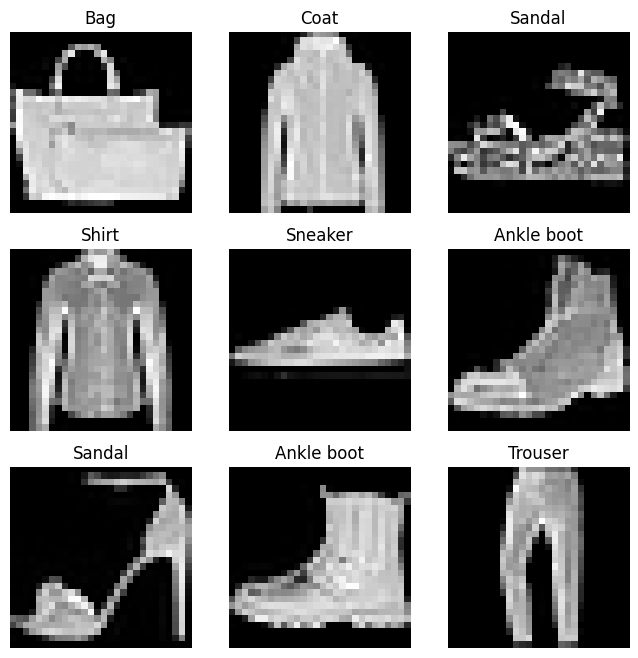

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display few images
images, labels = next(iter(trainloader))
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.show()


## 🧱 Step 3: Define the CNN Architecture
### Components:
- **Convolution layer:** Detects local patterns
- **ReLU:** Adds non-linearity
- **Pooling:** Reduces spatial size (downsampling)
- **Fully Connected Layer:** Maps to output classes

## 🌀 Pooling in CNN

**Definition:**

Pooling is a **downsampling operation** used in Convolutional Neural Networks (CNNs) to reduce the **spatial size (height and width)** of feature maps while retaining the most important information.

Pooling helps:
- Reduce **computational cost**  
- Make the network more **translation invariant**  
- Prevent **overfitting**

### 🧩 Types of Pooling
1. **Max Pooling** → Takes the **maximum** value in each window  
2. **Average Pooling** → Takes the **average** value in each window  

### 🖼️ Illustration
Consider a `4×4` feature map and a **2×2 pooling window** with stride `2`.

#### Input Feature Map:
\[
\begin{bmatrix}
1 & 3 & 2 & 4 \\
5 & 6 & 7 & 8 \\
3 & 2 & 1 & 0 \\
1 & 2 & 3 & 4
\end{bmatrix}
\]

#### Max Pooling (2×2 window, stride 2):

➡️ Output feature map:
\[
\begin{bmatrix}
6 & 8 \\
3 & 4
\end{bmatrix}
\]

**Effect:**  
- Original size: 4×4 = 16 values  
- After pooling: 2×2 = 4 values  
Pooling compresses data while preserving dominant features (like edges, corners, or textures).

Output after Max Pooling:
 tensor([[[[6., 8.],
          [3., 4.]]]])


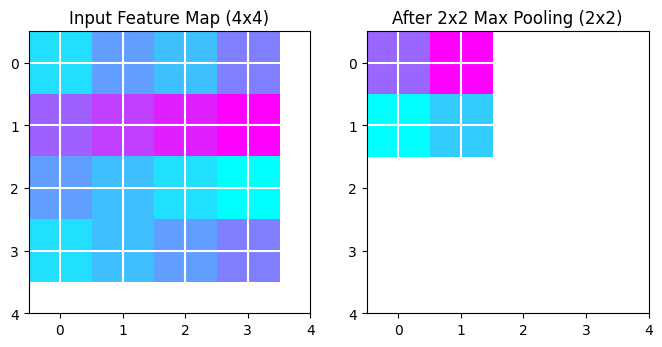

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Example feature map
x = torch.tensor([[[[1., 3., 2., 4.],
                    [5., 6., 7., 8.],
                    [3., 2., 1., 0.],
                    [1., 2., 3., 4.]]]])

# Define MaxPool2d with 2x2 kernel
pool = nn.MaxPool2d(2, 2)
output = pool(x)
print('Output after Max Pooling:\n', output)

# Visualize pooling window movement
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(x[0,0], cmap='cool')
axes[0].set_title('Input Feature Map (4x4)')

axes[1].imshow(output[0,0], cmap='cool')
axes[1].set_title('After 2x2 Max Pooling (2x2)')

for ax in axes:
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    ax.grid(True, color='white', linewidth=1.5)
plt.show()

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
print(model)


CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## ⚙️ Step 4: Define Loss and Optimizer

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## 🏋️ Step 5: Train the CNN Model

In [6]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}")


Epoch [1/5], Loss: 0.4346
Epoch [2/5], Loss: 0.2797
Epoch [3/5], Loss: 0.2363
Epoch [4/5], Loss: 0.2039
Epoch [5/5], Loss: 0.1795


## 📊 Step 6: Evaluate the Model on Test Data

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on 10,000 test images: {100 * correct / total:.2f}%')


Accuracy on 10,000 test images: 91.40%


## 👁️ Step 7: Visualize Predictions

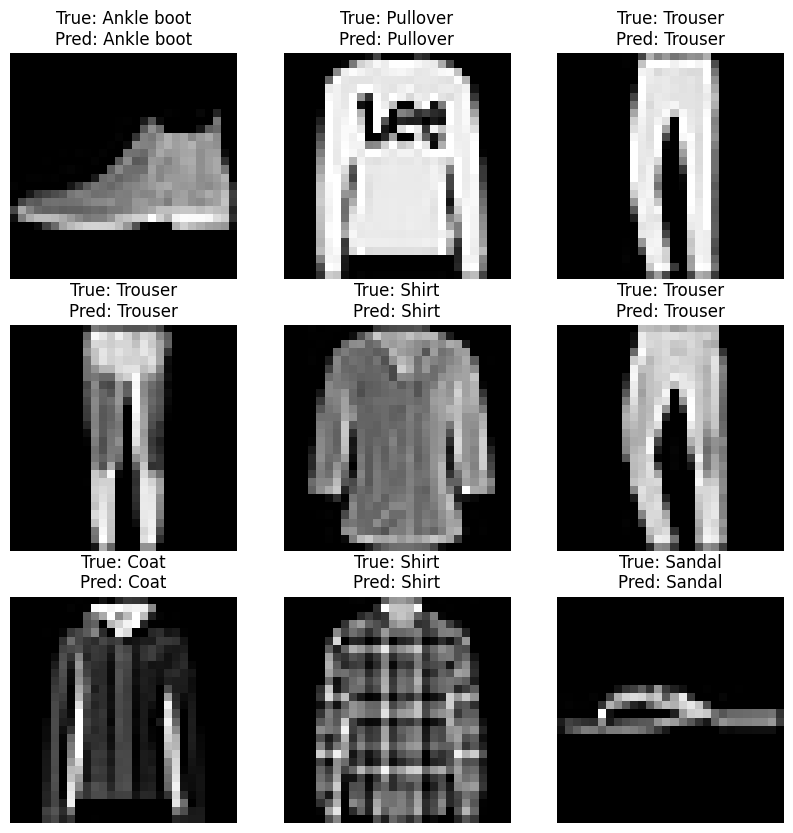

In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"True: {classes[labels[i]]}\nPred: {classes[preds[i]]}")
    plt.axis('off')
plt.show()
